# RDDs

# Creamos un contexo para crear RDDs

In [1]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder \
        .master("spark://spark-master:7077") \
        .appName("Transformaciones y Acciones sobre RDDs") \
        .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/13 17:21:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
spark

In [41]:
spark.stop()

In [3]:
sc=spark.sparkContext

# Cargamos un RDDs

Para la realzación del ejercicio, con ayuda del archivo paises, realizaremos el equivalente de operaciones 'select','count','group by' y 'filter / where'

Cambia el valor de la ruta para que apunte a la ruta donde tienes los datos

In [4]:
path = "/home/data/"

In [5]:
equiposOlimpicosRDD = sc.textFile(path+"paises.csv").map(lambda line : line.split(","))

In [6]:
equiposOlimpicosRDD.take(5)

[['id', 'equipo', 'sigla'],
 ['1', '30. Februar', 'AUT'],
 ['2', 'A North American Team', 'MEX'],
 ['3', 'Acipactli', 'MEX'],
 ['4', 'Acturus', 'ARG']]

### Determinamos la cantidad de siglas para los equipos olímpicos existentes

Con ayuda del método 'take', podrás identificar que en la ultima posisión tenemos las siguas para cada pais/equipo. 

Con esto obtenremos la cantidad precisa de equipos jugadores en los olimpicos

In [7]:
equiposOlimpicosRDD.map(lambda x : (x[2])).distinct().count()

231

### Agrupamos datos para poder determinar cuantos equipos posee un pais

Recuerda que los RDDs poseen una estructura de llave-valor, por lo cual debemos poner primero el valor 'llave'.

Con 'mapValues', al componente 'valor' le indicamos que operación deseamos que se le aplique.

In [8]:
equiposOlimpicosRDD.map(lambda x : (x[2], x[1] )).groupByKey().mapValues(list).take(2)

[('ARG',
  ['Acturus',
   'Antares',
   'Arcturus',
   'Ardilla',
   'Argentina',
   'Argentina-1',
   'Argentina-2',
   'Blue Red',
   'Covunco III',
   'Cupidon III',
   'Djinn',
   'Gullvinge',
   'Matrero II',
   'Mizar',
   'Pampero',
   'Rampage',
   'Tango',
   'Wiking']),
 ('AFG', ['Afghanistan'])]

In [9]:
equiposPaises=equiposOlimpicosRDD\
              .map(lambda x :  (x[2], x[1] ))\
              .groupByKey()\
              .mapValues(len)\
              .sortBy(lambda x: x[1],ascending=False)\
              .take(10)

<BarContainer object of 10 artists>

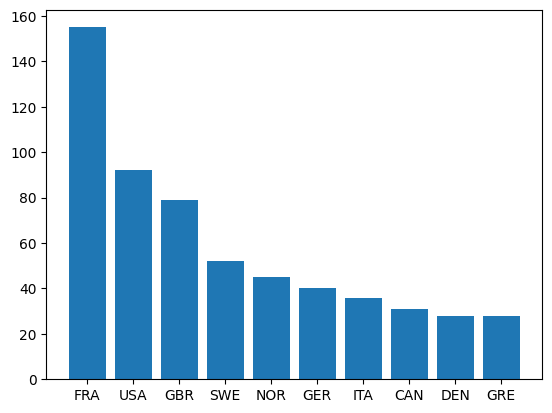

In [10]:
equiposPaises=dict(equiposPaises)
plt.bar(list(equiposPaises.keys()),list(equiposPaises.values()))

In [52]:
sc.stop()